# Deep Learning Introduction

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


## Tensor Object

In [18]:
tsr1 = tf.convert_to_tensor(1)
tsr2 = tf.convert_to_tensor(2)

ret2 = tf.add(tsr1, tsr2)
print(tsr1, tsr2, ret2)
print(ret2.shape, ret2.dtype)

tsr3 = tf.add(1,2)
print(tsr3)


tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(3, shape=(), dtype=int32)
() <dtype: 'int32'>
tf.Tensor(3, shape=(), dtype=int32)


## Constant

In [26]:
const = tf.constant(1.)
print(type(const))
print(const)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(1.0, shape=(), dtype=float32)


### Broadcasting

In [19]:
ret3 = tf.add([[1,2],
               [3,4]], 1)
print(ret3)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


### Operator Overloading

In [20]:
print(ret2 * ret3)

tf.Tensor(
[[ 6  9]
 [12 15]], shape=(2, 2), dtype=int32)


### 형변환


In [21]:
tensor1 = tf.convert_to_tensor(10)
print(tensor1)
tensor_f32 = tf.cast(tensor1, tf.float32)
print(tensor_f32)

tensor2 = tf.convert_to_tensor([1.8, 2.2])
print(tensor2)
tensor_int32 = tf.cast(tensor2, tf.int32)
print(tensor_int32)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1.8 2.2], shape=(2,), dtype=float32)
tf.Tensor([1 2], shape=(2,), dtype=int32)


### NumPy 호환성


In [22]:
import numpy as np

ndarray1 = np.array([1,2,3,4])
ndarray2 = np.array([2,3,4,5])
tensor = tf.add(ndarray1, ndarray2)
print(ndarray1, ndarray2, tensor)
print(tensor.shape, tensor.dtype)
print(np.array(tensor), tensor.numpy())

ndarr3 = np.add(tensor, 1)
print(type(ndarr3), ndarr3)

[1 2 3 4] [2 3 4 5] tf.Tensor([3 5 7 9], shape=(4,), dtype=int32)
(4,) <dtype: 'int32'>
[3 5 7 9] [3 5 7 9]
<class 'numpy.ndarray'> [ 4  6  8 10]


## 난수 생성


In [39]:
import tensorflow as tf

print(tf.random.normal((3,3)))
print(tf.random.truncated_normal((3,3)))
print(tf.random.uniform((3,3)))

tf.Tensor(
[[ 1.1748335   1.9058863  -1.6971089 ]
 [-0.13468505 -0.6353818   0.47058296]
 [ 0.2666564   1.844125   -1.5391822 ]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 0.30730018  0.75688726  1.5913124 ]
 [-0.1317046   0.09050433  0.7070529 ]
 [-0.31184563  1.0648348   1.3399209 ]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.45674193 0.8424816  0.1675365 ]
 [0.1141715  0.19001782 0.09423935]
 [0.7018807  0.6988872  0.8635855 ]], shape=(3, 3), dtype=float32)


## Variable

In [ ]:
import tensorflow as tf

v = tf.Variable(1.0)
print(v)

v.assign(3,0)
print(v)

v.assign(tf.square(v))
print(v)
print(v.numpy())

### 변수 랜덤 값 초기화

In [18]:
import tensorflow as tf

x = tf.Variable(tf.random.normal([]), name="x")
y = tf.Variable(tf.random.normal([2,3]), name="y")

print("x:", x)
print("y:", y)

x: <tf.Variable 'x:0' shape=() dtype=float32, numpy=-0.23415838>
y: <tf.Variable 'y:0' shape=(2, 3) dtype=float32, numpy=
array([[-0.823021 ,  1.7607627, -1.0683422],
       [ 0.5198051,  0.266848 , -1.0285709]], dtype=float32)>


## 자동 미분

In [45]:
#x = tf.constant(3.0)
x = tf.Variable(3.0)
with tf.GradientTape(persistent=True) as tape:
    #tape.watch(x)
    y = x * x  # y = x^2 , y = 3^2, y = 9
    z = y + y  # z = 2* (x^2), z = 2*y, z = 2*9, z = 18
    print(x.numpy(), y.numpy(), z.numpy()) 
dz_dx = tape.gradient(z, x)  # 12.0 (4x at x = 3)
dy_dx = tape.gradient(y, x)  # 6.0 (2x at x =3)
print("dz_dx:", dz_dx)
print("dy_dx:", dy_dx)
del tape  # 테이프에 대한 참조를 삭제합니다.

3.0 9.0 18.0
dz_dx: tf.Tensor(12.0, shape=(), dtype=float32)
dy_dx: tf.Tensor(6.0, shape=(), dtype=float32)


## Linear Regression 실습

(50,) (50,)


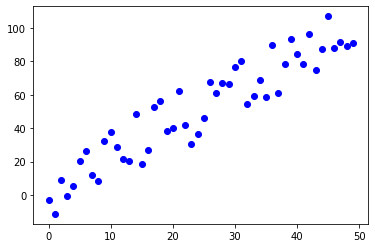

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

m = 50
X = tf.constant(range(m), tf.float32)
y = X * 2
y = y + tf.random.normal((50,)) *10
print(X.shape, y.shape)
plt.plot(X,y,'bo')

0, cost:8135.232421875, W:-0.5753058195114136
20, cost:126.50415802001953, W:1.9866983890533447
40, cost:119.59314727783203, W:2.0619590282440186
60, cost:119.5871810913086, W:2.0641701221466064
80, cost:119.587158203125, W:2.064234972000122


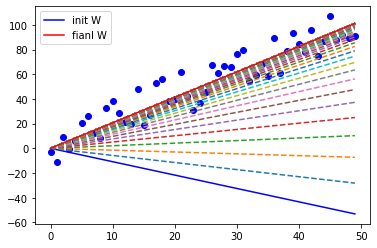

In [2]:
plt.plot(X,y,'bo')

W = tf.Variable(tf.random.normal(()))
plt.plot(X, X*W, 'b', label='init W')

lr = 0.0001
for i in range(100):
    with tf.GradientTape() as tape:
        h = W*X
        cost = tf.keras.losses.MSE(y, h)
    dw = tape.gradient(cost, W)
    W.assign( W - dw*lr)
    plt.plot(X, W*X, '--')
    if i %20 ==0:
        print(f'{i}, cost:{cost.numpy()}, W:{W.numpy()}')
plt.plot(X, W*X, 'r-', label='fianl W')
plt.legend()